Anggota:
- Guido Tamara -1301193303
- Najla Nur Adila - 1301194001

# **Informasi Data**

#### Sumber Data

Data set yang digunakan yaitu Dataset Breast Cancer Wisconsin (Diagnostic),
https://drive.google.com/drive/folders/1Rtq5Xcp4TZwDczi3AtWJZn6fBlEjxHAZ?usp=sharing

Tujuan dari notebook ini adalah penerapan Machine Learning Automation Tools yang digunakan adalah TPOT untuk mengklasifikasikan apakah massa tumor tersebut jinak (malignant) atau ganas (benign) pada payudara wanita.

# **Import Library**

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-Modeling Tasks
from sklearn.preprocessing import MinMaxScaler

# **Exploratory Data Analysis (EDA)**

### **Data Train**

In [13]:
#  Import the Data Train
df_train = pd.read_csv('Dataset/train.csv')
df_train.drop(['id'], axis=1, inplace=True)

# Menampilkan total dataset dan df_train 
print("Total Dataset :", len(df_train))
df_train

Total Dataset : 463


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.1471,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.186,0.2750,0.08902
2,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.1279,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
3,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.1052,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198,0.1043,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,B,13.000,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,...,14.34,31.88,91.06,628.5,0.1218,0.1093,0.04462,0.05921,0.2306,0.06291
459,B,9.755,28.20,61.68,290.9,0.07984,0.04626,0.01541,0.01043,0.1621,...,10.67,36.92,68.03,349.9,0.1110,0.1109,0.0719,0.04866,0.2321,0.07211
460,M,17.080,27.15,111.20,930.9,0.09898,0.11100,0.1007,0.06431,0.1793,...,22.96,34.49,152.10,1648.0,0.1600,0.2444,0.2639,0.1555,0.3010,0.09060
461,M,27.420,26.27,186.90,2501.0,0.10840,0.19880,0.3635,0.1689,0.2061,...,36.04,31.37,251.20,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427


In [14]:
# Menghitung kolom diagnosis
df_train['diagnosis'].value_counts()

B    275
M    188
Name: diagnosis, dtype: int64

In [15]:
# Label Encoding

# Mengganti pada kolom diagnosis untuk menggunakan label
def label_encoding(df):
    df['diagnosis'] = df['diagnosis'].replace(['M', 'B'], [1, 0])

label_encoding(df_train)
df_train.sample(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
153,0,11.15,13.08,70.87,381.9,0.09754,0.05113,0.01982,0.01786,0.1830,...,11.99,16.30,76.25,440.8,0.1341,0.08971,0.07116,0.05506,0.2859,0.06772
36,1,14.25,21.72,93.63,633.0,0.09823,0.10980,0.1319,0.05598,0.1885,...,15.89,30.36,116.20,799.6,0.1446,0.42380,0.5186,0.1447,0.3591,0.10140
212,1,28.11,18.47,188.50,2499.0,0.11420,0.15160,0.3201,0.1595,0.1648,...,28.11,18.47,188.50,2499.0,0.1142,0.15160,0.3201,0.1595,0.1648,0.05525
393,1,21.61,22.28,144.40,1407.0,0.11670,0.20870,0.281,0.1562,0.2162,...,26.23,28.74,172.00,2081.0,0.1502,0.57170,0.7053,0.2422,0.3828,0.10070
223,1,15.75,20.25,102.60,761.3,0.10250,0.12040,0.1147,0.06462,0.1935,...,19.56,30.29,125.90,1088.0,0.1552,0.44800,0.3976,0.1479,0.3993,0.10640


In [16]:
# Mengecek informasi tentang df_train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                463 non-null    int64  
 1   radius_mean              463 non-null    float64
 2   texture_mean             463 non-null    float64
 3   perimeter_mean           463 non-null    float64
 4   area_mean                463 non-null    float64
 5   smoothness_mean          463 non-null    float64
 6   compactness_mean         463 non-null    float64
 7   concavity_mean           463 non-null    object 
 8   concave points_mean      463 non-null    object 
 9   symmetry_mean            463 non-null    float64
 10  fractal_dimension_mean   463 non-null    float64
 11  radius_se                463 non-null    float64
 12  texture_se               463 non-null    float64
 13  perimeter_se             463 non-null    float64
 14  area_se                  4

In [17]:
# Mengubah dtype object ke float
df_train['concavity_mean']= pd.to_numeric(df_train['concavity_mean'], errors='coerce')
df_train['concave points_mean']= pd.to_numeric(df_train['concave points_mean'], errors='coerce')
df_train['concavity_se']= pd.to_numeric(df_train['concavity_se'], errors='coerce')
df_train['concave points_se']= pd.to_numeric(df_train['concave points_se'], errors='coerce')
df_train['concavity_worst']= pd.to_numeric(df_train['concavity_worst'], errors='coerce')
df_train['concave points_worst']= pd.to_numeric(df_train['concave points_worst'], errors='coerce')

df_train.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [18]:
# Menampilkan rangkaian data ringkasan numerik
df_train.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,456.000000,456.000000,463.000000,...,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,456.000000,456.000000,463.000000,463.000000
mean,0.406048,236.667337,19.515745,92.786393,666.295032,0.096341,0.104633,0.092614,0.051013,0.182116,...,16.472354,25.579503,108.584384,903.777538,0.132454,0.256777,0.281623,0.118684,0.293355,0.083819
std,0.491625,4224.020741,8.978351,24.392039,356.167006,0.013692,0.053844,0.081184,0.039184,0.028023,...,4.900876,6.145821,34.002042,583.850860,0.022941,0.161901,0.210755,0.065857,0.064266,0.018354
min,0.000000,8.196000,9.710000,43.790000,143.500000,0.062510,0.019380,0.000692,0.001852,0.116700,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.001845,0.008772,0.156500,0.055040
25%,0.000000,11.800000,16.070000,75.485000,427.950000,0.086580,0.064130,0.029878,0.020688,0.162100,...,13.060000,20.940000,84.480000,519.300000,0.116600,0.144950,0.116625,0.064747,0.252600,0.071250
50%,0.000000,13.480000,18.770000,86.910000,559.200000,0.096100,0.092180,0.067780,0.035875,0.180000,...,15.030000,25.260000,98.270000,698.700000,0.131400,0.211900,0.237650,0.102800,0.284100,0.079930
75%,1.000000,16.150000,21.680000,106.450000,804.100000,0.105350,0.130550,0.135600,0.077603,0.196500,...,19.515000,29.615000,128.900000,1170.000000,0.146350,0.343700,0.392700,0.171300,0.320400,0.092095
max,1.000000,90000.000000,190.000000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [19]:
# Mengecek nilai Null Data Train
df_train.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             7
concave points_mean        7
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               7
concave points_se          7
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            7
concave points_worst       7
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [20]:
# (Handling) Mengatasi Missing Values pada data train 
df_train.fillna(df_train.median(), inplace=True)
             
df_train = df_train.fillna(df_train.mode().iloc[0]) 
df_train.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

#### **Visualization Tasks**

0    275
1    188
Name: diagnosis, dtype: int64


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

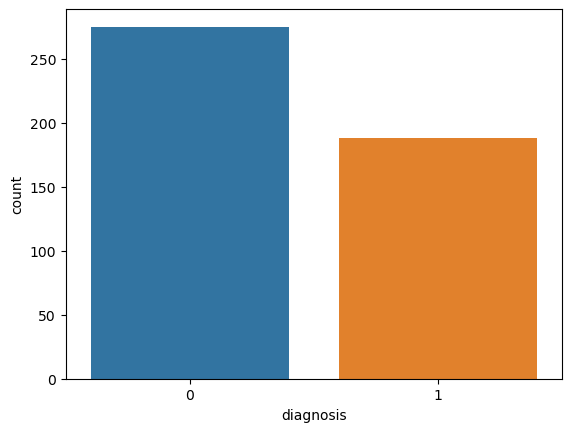

In [21]:
# Melihat kolom diagnosis dalam bentuk bar plot
print(df_train['diagnosis'].value_counts())
sns.countplot(x='diagnosis',data=df_train)

dari grafik diatas dapat melihat bahwa jumlah bengin(noncancers) yang terdeteksi lebih banyak daripada malignant

C:\Users\grend\AppData\Local\Temp\ipykernel_7892\2268557395.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_train.corr(), dtype=np.bool))


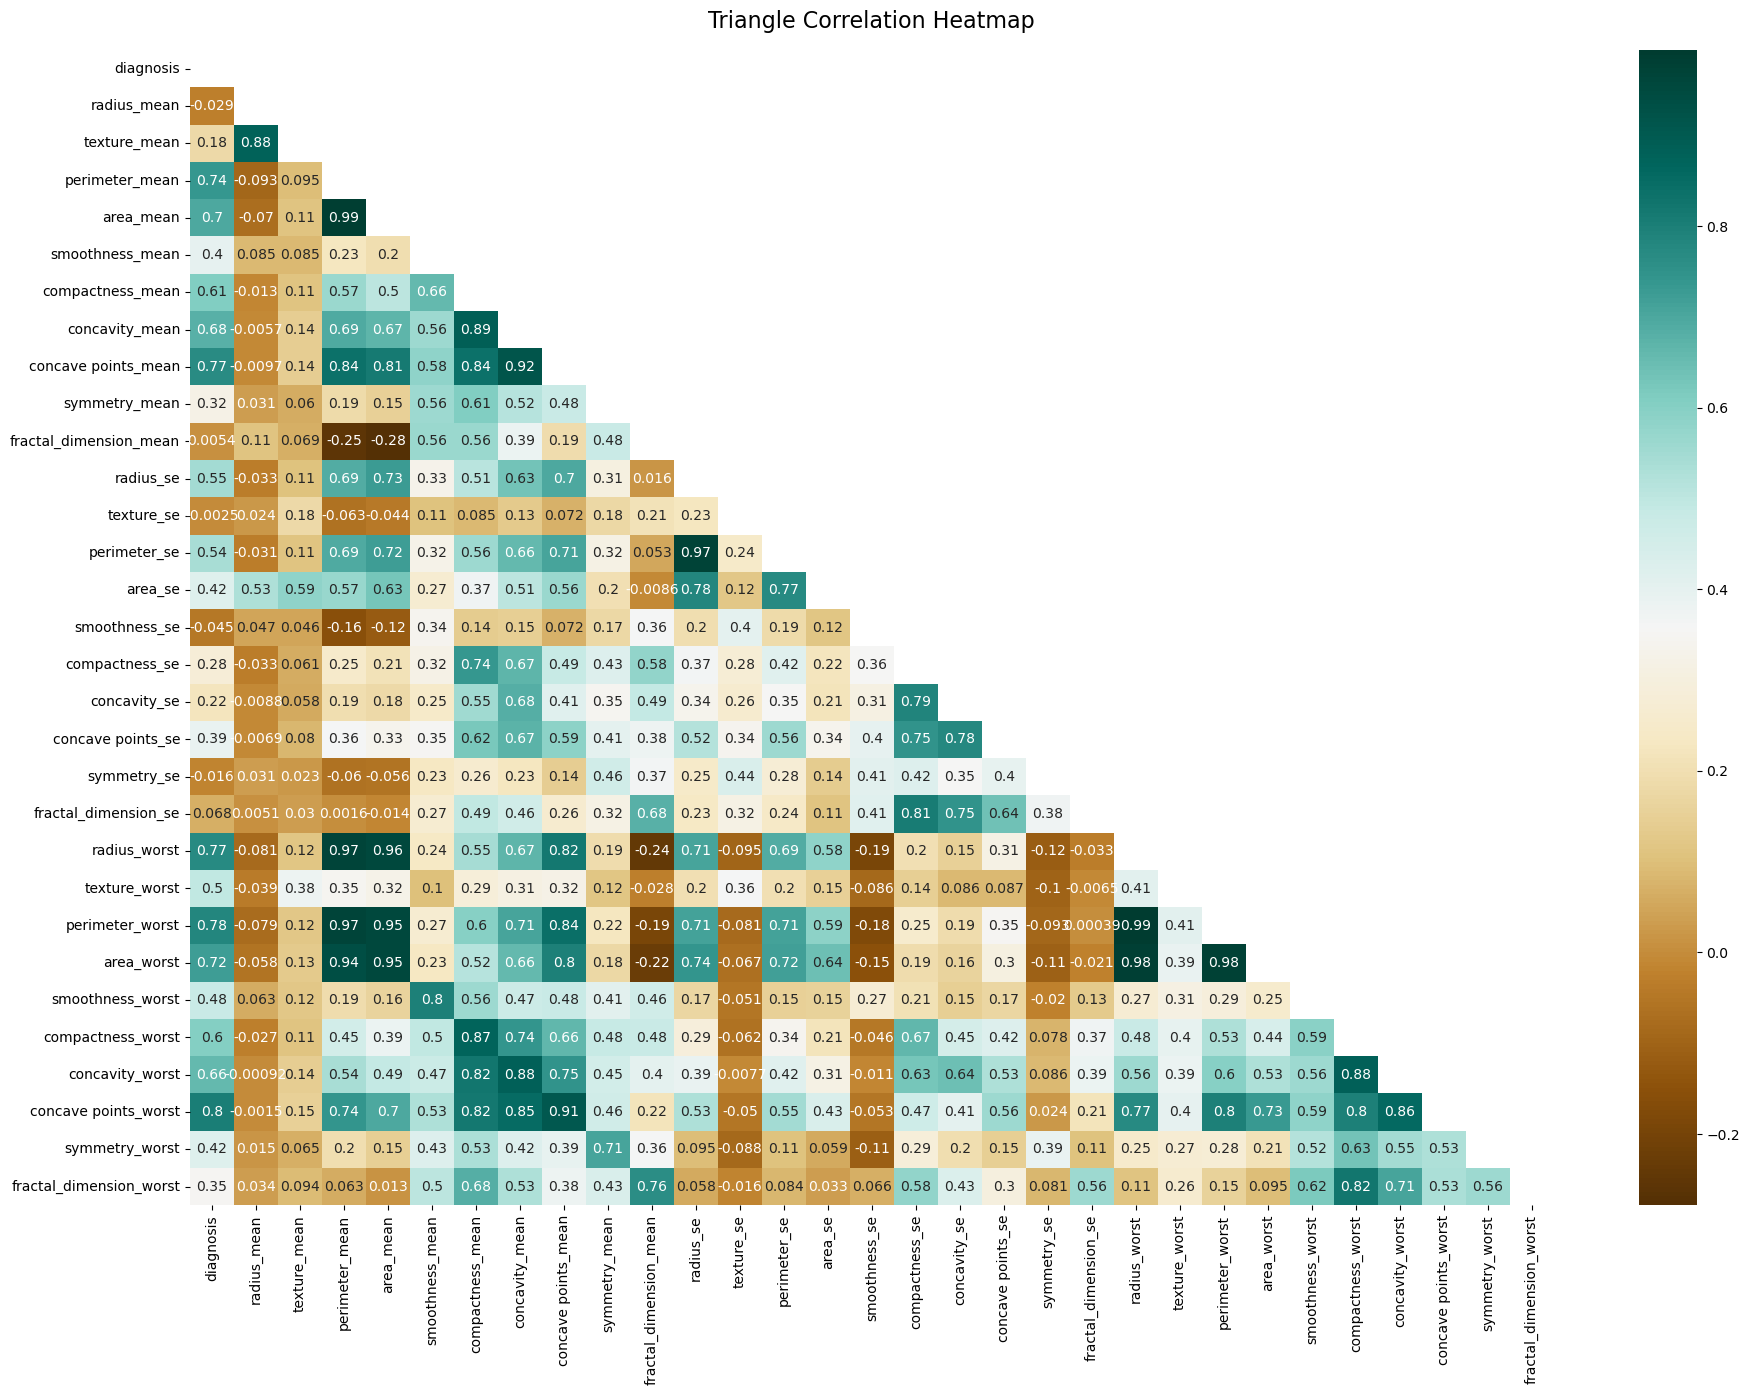

In [22]:
# Melihat Nilai Korelasi Antar Variable Dengan Heatmap Data Train
plt.figure(figsize=(22, 15))
mask = np.triu(np.ones_like(df_train.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_train.corr(), mask=mask, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 16}, pad=16)
plt.show()

'concave points_worst', 'perimeter_worst' dan 'radius_worst' berkorelasi kuat dengan 'diagnosis'

### **Data Test**

In [23]:
#  Import the Data Test
df_test = pd.read_csv('Dataset/test.csv')
df_test.drop(['id'], axis=1, inplace=True)

print("Total Dataset :", len(df_test))
df_test.sample(5)

Total Dataset : 106


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
33,12.65,18.17,82.69,485.6,0.10760,0.13340,0.08017,0.05074,0.1641,0.06854,...,14.38,22.15,95.29,633.7,0.1533,0.3842,0.3582,0.14070,0.3230,0.10330
99,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,...,17.52,42.79,128.70,915.0,0.1417,0.7917,1.1700,0.23560,0.4089,0.14090
0,11.60,18.36,73.88,412.7,0.08508,0.05855,0.03367,0.01777,0.1516,0.05859,...,12.77,24.02,82.68,495.1,0.1342,0.1808,0.1860,0.08288,0.3210,0.07863
23,14.64,16.85,94.21,666.0,0.08641,0.06698,0.05192,0.02791,0.1409,0.05355,...,16.46,25.44,106.00,831.0,0.1142,0.2070,0.2437,0.07828,0.2455,0.06596
65,13.94,13.17,90.31,594.2,0.12480,0.09755,0.10100,0.06615,0.1976,0.06457,...,14.62,15.38,94.52,653.3,0.1394,0.1364,0.1559,0.10150,0.2160,0.07253


In [24]:
# Mengecek informasi tentang df_test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              106 non-null    float64
 1   texture_mean             106 non-null    float64
 2   perimeter_mean           106 non-null    float64
 3   area_mean                106 non-null    float64
 4   smoothness_mean          106 non-null    float64
 5   compactness_mean         106 non-null    float64
 6   concavity_mean           106 non-null    float64
 7   concave points_mean      106 non-null    float64
 8   symmetry_mean            106 non-null    float64
 9   fractal_dimension_mean   106 non-null    float64
 10  radius_se                106 non-null    float64
 11  texture_se               106 non-null    float64
 12  perimeter_se             106 non-null    float64
 13  area_se                  106 non-null    float64
 14  smoothness_se            1

In [25]:
# Menampilkan rangkaian data ringkasan numerik df_test
df_test.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,...,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,13.598783,19.967830,88.398868,605.068868,0.096446,0.103064,0.078255,0.043144,0.176993,0.063826,...,15.381783,26.104057,101.481698,779.271698,0.131993,0.243292,0.249579,0.104633,0.275752,0.084499
std,3.437080,4.680723,23.670943,329.687102,0.015655,0.048266,0.071535,0.035766,0.024262,0.007377,...,4.439474,6.159044,31.298692,490.894239,0.022457,0.135758,0.192680,0.059421,0.047731,0.016795
min,7.691000,11.280000,47.920000,170.400000,0.052630,0.033980,0.000000,0.000000,0.106000,0.052430,...,8.678000,14.200000,54.490000,223.600000,0.089960,0.052130,0.000000,0.000000,0.156600,0.058710
25%,11.495000,16.590000,73.907500,403.050000,0.085088,0.067015,0.030793,0.020917,0.160400,0.058943,...,12.455000,21.777500,81.447500,473.900000,0.116825,0.154750,0.126125,0.069820,0.241550,0.072590
50%,13.010000,19.550000,84.170000,525.600000,0.095030,0.096870,0.052275,0.030680,0.172450,0.062715,...,14.475000,25.490000,95.020000,641.000000,0.129500,0.214700,0.191200,0.097990,0.268750,0.080280
75%,14.855000,22.647500,96.322500,680.850000,0.104875,0.126825,0.102675,0.053027,0.191575,0.067328,...,16.697500,30.192500,112.075000,851.825000,0.142725,0.309275,0.345775,0.135700,0.305975,0.091690
max,24.630000,30.620000,165.500000,1841.000000,0.163400,0.277000,0.351400,0.152000,0.239700,0.095750,...,30.790000,42.790000,211.500000,2782.000000,0.200600,0.868100,1.170000,0.265000,0.467700,0.140900


In [26]:
# Mengecek nilai Null data test
df_test.isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

C:\Users\grend\AppData\Local\Temp\ipykernel_7892\228555296.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_test.corr(), dtype=np.bool))


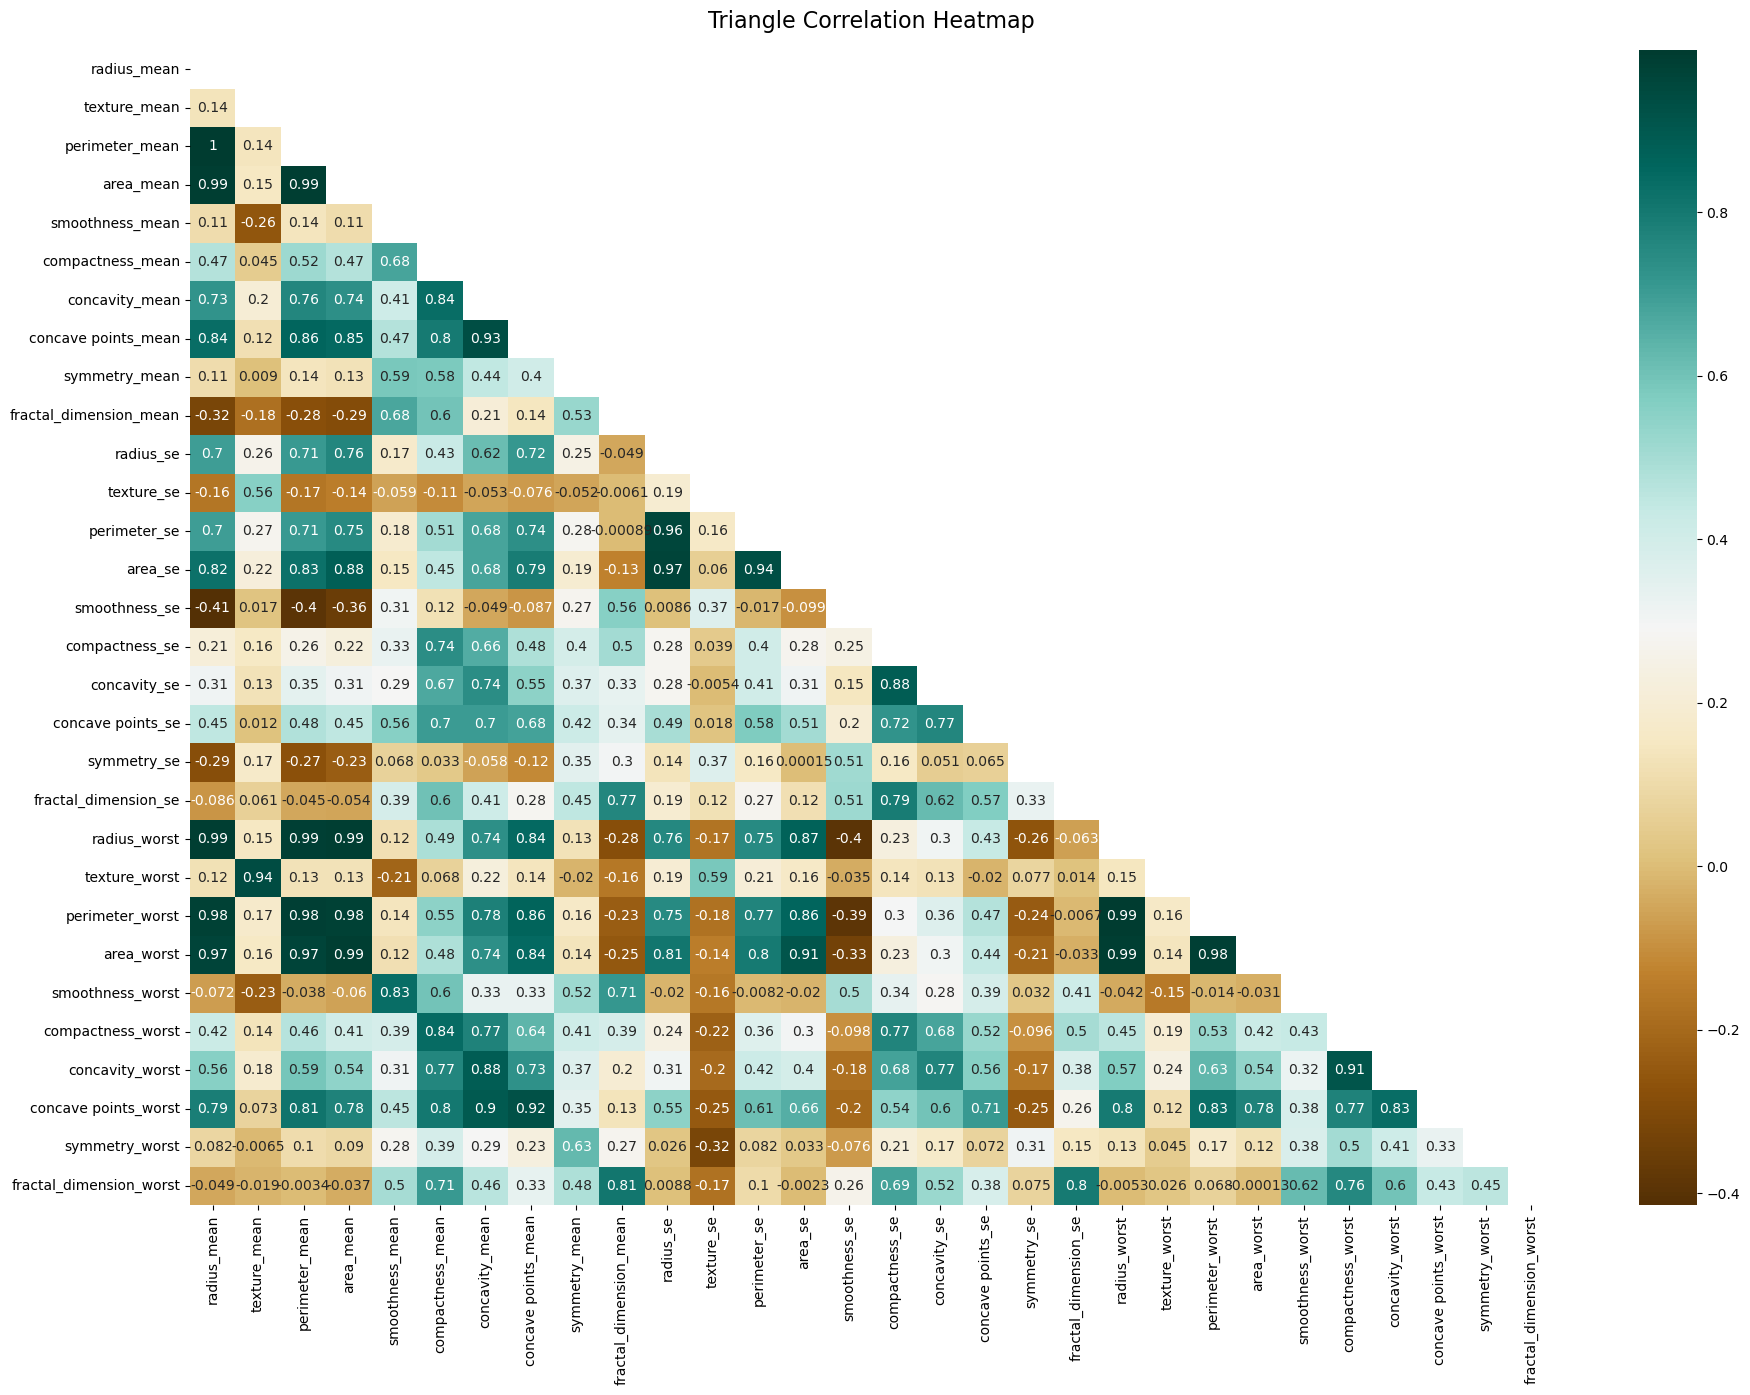

In [27]:
# Melihat Nilai Korelasi Antar Variable Dengan Heatmap Data Test

plt.figure(figsize=(22, 15))
mask = np.triu(np.ones_like(df_test.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_test.corr(), mask=mask, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 16}, pad=16)
plt.show()

# **Data Duplikasi**

In [28]:
# Data Train
duplicate = list(df_train.duplicated())
print("Data Duplikasi :", duplicate.count(True))

Data Duplikasi : 0


In [29]:
# Data Test
duplicate = list(df_test.duplicated())
print("Data Duplikasi :", duplicate.count(True))

Data Duplikasi : 0


# **Pre-Modeling Tasks**

### **Scaling Data**

MinMaxScaler menskala ulang kumpulan data sehingga semua nilai fitur berada dalam kisaran [0, 1].

In [30]:
numerical = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 
             'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 
             'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 
             'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 
             'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
scaler = MinMaxScaler()

df_train[numerical] = scaler.fit_transform(df_train[numerical].values)
df_train

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.000109,0.003716,0.545989,0.363733,0.680010,0.792037,0.702658,0.728615,0.668446,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.567974,0.909293,0.598462,0.418864
1,1,0.000138,0.044706,0.615783,0.501591,0.270471,0.181768,0.202315,0.342707,0.344367,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.191780,0.627960,0.233590,0.222878
2,1,0.000128,0.064008,0.595743,0.449417,0.572941,0.431017,0.461639,0.632301,0.481580,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.358800,0.829925,0.403706,0.213433
3,1,0.000036,0.059182,0.233501,0.102906,0.973233,0.811361,0.564899,0.518430,0.763481,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.547976,0.881302,1.000000,0.773711
4,1,0.000134,0.025681,0.630986,0.489290,0.459788,0.347893,0.463047,0.513915,0.342766,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.318485,0.544694,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,0,0.000053,0.085529,0.268261,0.159788,0.257696,0.096160,0.026679,0.079098,0.266951,...,0.228033,0.529318,0.202450,0.108951,0.334346,0.079567,0.034216,0.178714,0.146067,0.051620
459,0,0.000017,0.102557,0.123627,0.062524,0.210853,0.082449,0.034541,0.043030,0.242392,...,0.097474,0.663646,0.087753,0.040479,0.263026,0.081119,0.056037,0.141333,0.149024,0.111964
460,1,0.000099,0.096733,0.465828,0.333998,0.443728,0.281026,0.234701,0.313311,0.334223,...,0.534685,0.598881,0.506450,0.359516,0.586608,0.210641,0.209618,0.519892,0.284841,0.233242
461,1,0.000214,0.091852,0.988943,1.000000,0.558340,0.550334,0.851446,0.837972,0.477309,...,1.000000,0.515725,1.000000,1.000000,0.426137,0.386442,0.545096,0.899018,0.212103,0.126131


In [31]:
df_test[numerical] = scaler.transform(df_test[numerical].values)
df_test.sample(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
38,0.000062,0.081979,0.335429,0.191898,0.653242,0.456168,0.316840,0.329765,0.591564,0.471988,...,0.287442,0.557569,0.276856,0.148152,0.714720,0.358306,0.268971,0.507845,0.411197,0.414929
105,-0.000005,0.082256,0.028540,0.015907,-0.120209,0.074351,-0.001624,-0.009290,0.224239,0.187026,...,0.054287,0.489072,0.043578,0.020497,0.124084,0.036043,-0.001476,-0.031081,0.257441,0.100682
62,0.000004,0.018803,0.074217,0.033001,0.499939,0.174652,0.058572,0.066457,0.272824,0.448610,...,0.054891,0.171375,0.064196,0.022218,0.613683,0.190364,0.138827,0.270519,0.279519,0.327037
7,0.000016,0.048699,0.122314,0.061760,0.327899,0.132507,0.067560,0.066657,0.571810,0.298441,...,0.114194,0.362473,0.101947,0.049155,0.344912,0.123129,0.100672,0.201355,0.317169,0.198085
58,0.000183,0.065949,0.841061,0.720042,0.492639,0.586528,0.540492,0.728615,0.439936,0.367102,...,0.782284,0.397388,0.773395,0.603814,0.416232,0.379845,0.371118,0.845869,0.313818,0.273318


### **Save Dataset**

In [32]:
df_train.to_csv('Dataset/train_clean.csv', index=False)
df_test.to_csv('Dataset/test_clean.csv', index=False)